In [8]:
import numpy as np
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import Callback,ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.model_selection import StratifiedKFold
from keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

import seaborn as sns

# Part A

## Building Data

In [9]:
mat = scio.loadmat('data/97.mat')
variables = scio.whosmat('data/97.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X097_DE_time']
data2 = mat['X097_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
# normal1=np.zeros(100,200,200)
normal=[]

for i in range(100):
    a=np.concatenate([df1.values[i*200:200+i*200], df2.values[i*200:200+i*200]])
    a=np.reshape(a,(200,2))
    normal.append(a)
    
    
normal=np.squeeze(normal)
normal.shape

(100, 200, 2)

In [10]:
mat = scio.loadmat('data/105.mat')
variables = scio.whosmat('data/105.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X105_DE_time']
data2 = mat['X105_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
f1=[]
for i in range(100):
    a=np.concatenate([df1.values[i*200:200+i*200], df2.values[i*200:200+i*200]])
    a=np.reshape(a,(200,2))
    f1.append(a)
f1=np.squeeze(f1)
f1.shape

(100, 200, 2)

In [11]:
mat = scio.loadmat('data/130.mat')
variables = scio.whosmat('data/130.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X130_DE_time']
data2 = mat['X130_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
f2=[]
for i in range(100):
    a=np.concatenate([df1.values[i*200:200+i*200], df2.values[i*200:200+i*200]])
    a=np.reshape(a,(200,2))
    f2.append(a)
f2=np.squeeze(f2)
f2.shape

(100, 200, 2)

In [12]:
mat = scio.loadmat('data/118.mat')
variables = scio.whosmat('data/118.mat')
# print(variables)

# Choose the appropriate key for your data based on the output of the previous step
data1 = mat['X118_DE_time']
data2 = mat['X118_FE_time']
# Convert the data to a DataFrame
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
f3=[]
for i in range(100):
    a=np.concatenate([df1.values[i*200:200+i*200], df2.values[i*200:200+i*200]])
    a=np.reshape(a,(200,2))
    f3.append(a)
f3=np.squeeze(f3)
f3.shape

(100, 200, 2)

In [13]:
X = np.concatenate((normal, f1, f2, f3))
y = np.concatenate((np.zeros(len(normal)), np.ones(len(f1)), 2*np.ones(len(f2)), 3*np.ones(len(f3))))

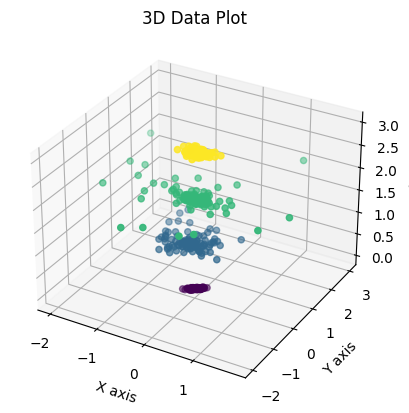

In [14]:
X_reshaped = X.reshape((400, -1))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_reshaped[:, 0], X_reshaped[:, 1], y,c=y)

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Label')
ax.set_title('3D Data Plot')

# Show the plot
plt.show()

## PCA

(400, 3)


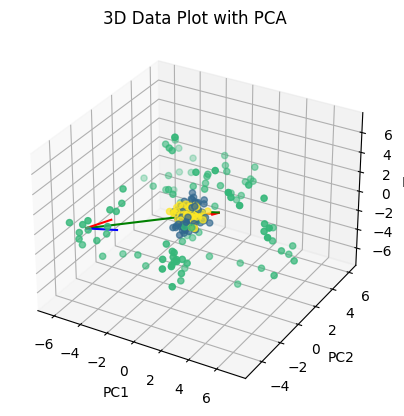

In [15]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_reshaped)
print(X_pca.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)

origin = [0, 0, 0]
U = -10*pca.components_[:, 0] 
V = -10*pca.components_[:, 1]
W = -10*pca.components_[:, 3]
ax.quiver(origin[0], origin[1], origin[2], U, V, W, color=['r','g','b'], length=7)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Data Plot with PCA')

# Show the plot
plt.show()


## LDA

Text(0.5, 0.92, '3D Data Plot with LDA')

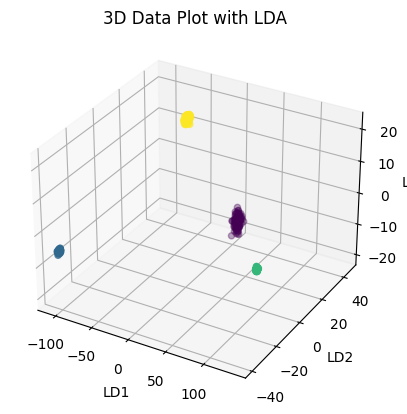

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X_reshaped, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y)

ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
ax.set_title('3D Data Plot with LDA')

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
silhouette = silhouette_score(X_reshaped, y)
print("Silhouette Score of main data:", silhouette)

silhouette = silhouette_score(X_pca, y)
print("Silhouette Score of pca output data:", silhouette)

silhouette = silhouette_score(X_lda, y)
print("Silhouette Score of lda output data:", silhouette)
print()
# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X_reshaped, y)
print("Calinski-Harabasz Index of main data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(X_pca, y)
print("Calinski-Harabasz Index of pca output data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(X_lda, y)
print("Calinski-Harabasz Index of lda output data:", calinski_harabasz)

print()

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X_reshaped, y)
print("Davies-Bouldin Index of main data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(X_pca, y)
print("Davies-Bouldin Index of pca output data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(X_lda, y)
print("Davies-Bouldin Index of lda output data:", davies_bouldin)

Silhouette Score of main data: -0.10694228309407235
Silhouette Score of pca output data: 0.009023027568724301
Silhouette Score of lda output data: 0.9710128022094038

Calinski-Harabasz Index of main data: 3.121287904495441
Calinski-Harabasz Index of pca output data: 0.12325403705697519
Calinski-Harabasz Index of lda output data: 397505.65944058815

Davies-Bouldin Index of main data: 8.946032228469008
Davies-Bouldin Index of pca output data: 32.096883998559086
Davies-Bouldin Index of lda output data: 0.04806667670316292


## MLP on base data

In [10]:
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(X.reshape((400, -1)), y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape

num_classes = 4

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
import keras
opt = keras.optimizers.Adam(learning_rate=0.00009)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                25664     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 30,084
Trainable params: 30,084
Non-trainable params: 0
_________________________________________________________________


In [11]:
history= model.fit(x_train, y_train , batch_size=32, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
10/10 [==============================] - 1s 31ms/step - loss: 1.4348 - accuracy: 0.2062 - val_loss: 1.3860 - val_accuracy: 0.2500
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 1.4062 - accuracy: 0.2156 - val_loss: 1.3667 - val_accuracy: 0.2625
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 1.3811 - accuracy: 0.2438 - val_loss: 1.3490 - val_accuracy: 0.2875
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 1.3571 - accuracy: 0.2688 - val_loss: 1.3318 - val_accuracy: 0.3000
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 1.3363 - accuracy: 0.2844 - val_loss: 1.3151 - val_accuracy: 0.2875
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 1.3145 - accuracy: 0.3063 - val_loss: 1.2999 - val_accuracy: 0.2875
Epoch 7/300
10/10 [==============================] - 0s 4ms/step - loss: 1.2947 - accuracy: 0.3313 - val_loss: 1.2858 - val_accuracy: 0.3250
Epoch 8/300


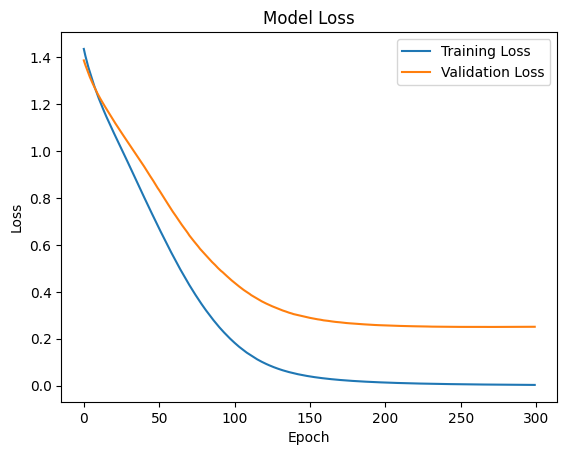

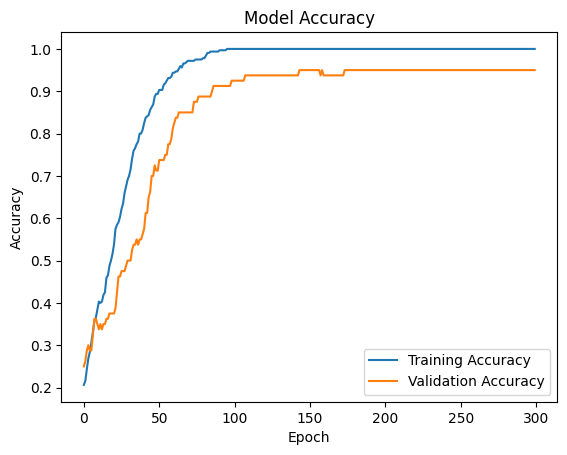

1/1 [==============================] - 0s 21ms/step - loss: 0.2512 - accuracy: 0.9500
Test loss: 0.2511710524559021
Test accuracy: 0.949999988079071


In [12]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [13]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
y_test_classes= to_categorical(y_test, 4)
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

3/3 [==============================] - 0s 1ms/step
Test AUC: 0.9712044534412956
Test Recall: 0.95
Test F1-score: 0.9500000000000001
Test Precision: 0.95


Confusion Matrix:


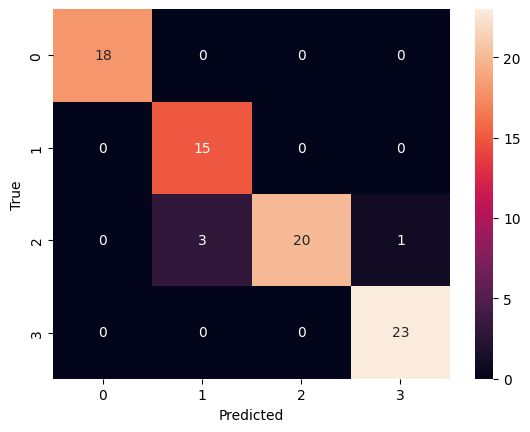

In [14]:
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

## MLP on LDA output

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_lda.reshape((400, -1)), y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape
print(X.shape)
num_classes = 4

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
import keras
opt = keras.optimizers.Adam(learning_rate=0.005)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=32, epochs=50, validation_data=(x_test, y_test))

(400, 200, 2)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dense_4 (Dense)             (None, 4)                 260       
                                                                 
Total params: 516
Trainable params: 516
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 16ms/step - loss: 1.5958 - accuracy: 0.7344 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 3.7400e-04 - accuracy: 1.0000 - val_loss: 2.9659e-05 - val_accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 2.0013e-05 - accuracy: 1.0000 - val_loss: 1.4148e-05 - val_accuracy: 1.0000
E

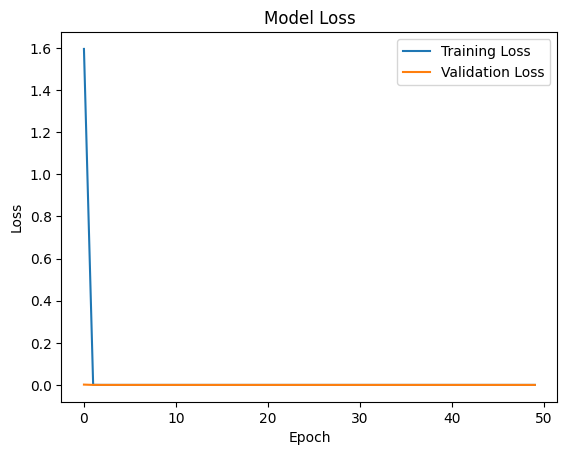

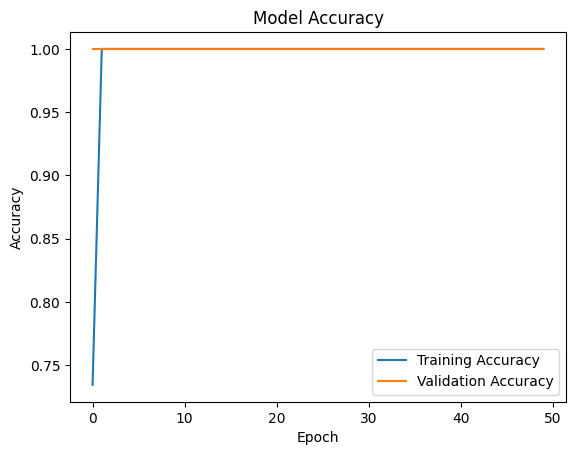

1/1 [==============================] - 0s 44ms/step - loss: 2.8789e-06 - accuracy: 1.0000
Test loss: 2.878887244150974e-06
Test accuracy: 1.0


In [16]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
y_test_classes= to_categorical(y_test, 4)
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, f1_score, precision_score
auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

3/3 [==============================] - 0s 2ms/step
Test AUC: 1.0
Test Recall: 1.0
Test F1-score: 1.0
Test Precision: 1.0


Confusion Matrix:


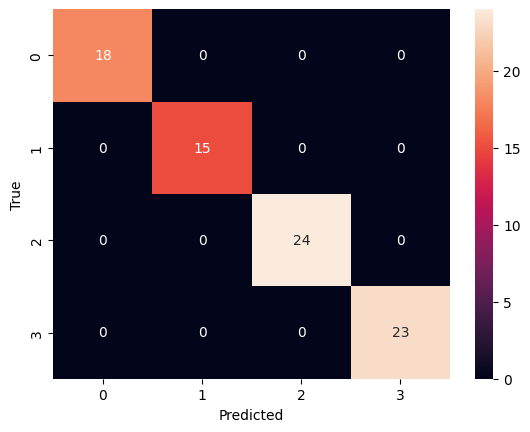

In [18]:
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

## RBF on base Data

In [19]:
from keras.layers import Input, Dense, Activation, Flatten, Dropout, Lambda
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD

# Step 1: Data Preprocessing
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.reshape((400, -1)))


x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape
print(X.shape)
num_classes = 4

import keras.backend as K

model = Sequential()
model.add(Dense(64, activation='linear', input_shape=input_shape))
model.add(Lambda(lambda x: 1.2*K.exp(-K.pow(x,2))))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.002), metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=32, epochs=800, validation_data=(x_test, y_test))

(400, 200, 2)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                25664     
                                                                 
 lambda (Lambda)             (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 4)                 260       
                                                                 
Total params: 25,924
Trainable params: 25,924
Non-trainable params: 0
_________________________________________________________________


Epoch 1/800
10/10 [==============================] - 0s 18ms/step - loss: 1.7313 - accuracy: 0.3469 - val_loss: 1.5600 - val_accuracy: 0.3000
Epoch 2/800
10/10 [==============================] - 0s 5ms/step - loss: 1.3839 - accuracy: 0.4156 - val_loss: 1.3320 - val_accuracy: 0.3375
Epoch 3/800
10/10 [==============================] - 0s 5ms/step - loss: 1.1936 - accuracy: 0.5063 - val_loss: 1.2244 - val_accuracy: 0.4625
Epoch 4/800
10/10 [==============================] - 0s 5ms/step - loss: 1.0735 - accuracy: 0.5938 - val_loss: 1.1567 - val_accuracy: 0.5250
Epoch 5/800
10/10 [==============================] - 0s 4ms/step - loss: 0.9725 - accuracy: 0.6750 - val_loss: 1.1050 - val_accuracy: 0.5625
Epoch 6/800
10/10 [==============================] - 0s 5ms/step - loss: 0.8887 - accuracy: 0.7437 - val_loss: 1.0590 - val_accuracy: 0.6250
Epoch 7/800
10/10 [==============================] - 0s 5ms/step - loss: 0.8155 - accuracy: 0.8062 - val_loss: 1.0191 - val_accuracy: 0.6375
Epoch 8/800


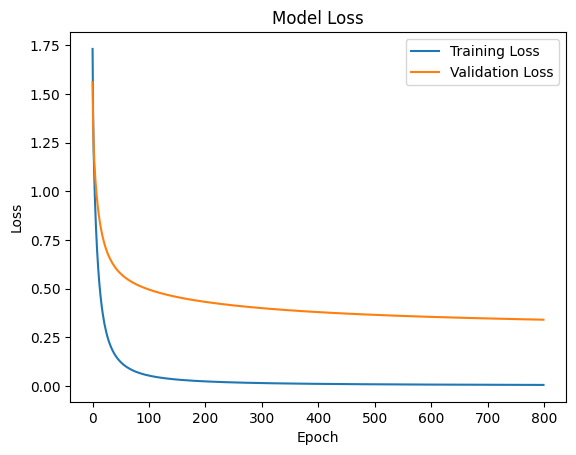

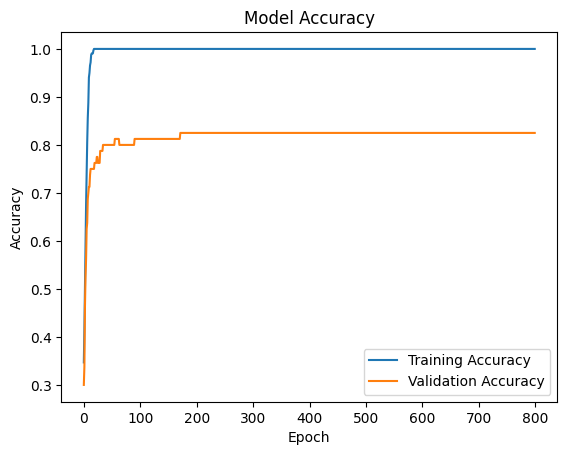

1/1 [==============================] - 0s 23ms/step - loss: 0.3397 - accuracy: 0.8250
Test loss: 0.339662104845047
Test accuracy: 0.824999988079071


In [20]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
y_test_classes= to_categorical(y_test, 4)

auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

3/3 [==============================] - 0s 1ms/step
Test AUC: 0.9007208817639633
Test Recall: 0.8125
Test F1-score: 0.8552631578947368
Test Precision: 0.9027777777777778


Confusion Matrix:


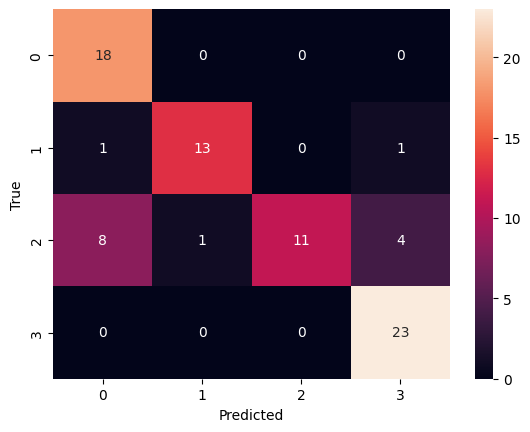

In [22]:
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

## RBF on LDA output

In [23]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_lda.reshape((400, -1)))

x_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape
print(X.shape)
num_classes = 4

import keras.backend as K

model = Sequential()
model.add(Dense(16, activation='linear', input_shape=input_shape))
model.add(Lambda(lambda x: 3*K.exp(-K.pow(x,2))))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.7), metrics=['accuracy'])
history= model.fit(x_train, y_train , batch_size=32, epochs=100, validation_data=(x_test, y_test))

(400, 200, 2)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                64        
                                                                 
 lambda_1 (Lambda)           (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 2.5639 - accuracy: 0.2844 - val_loss: 1.2276 - val_accuracy: 0.5750
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0410 - accuracy: 0.6094 - val_loss: 0.8658 - val_accuracy: 0.9875
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7368 - accuracy: 0.9563 - val_loss: 0.6373 - val_accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5433 - accuracy: 1.0000 - val_loss: 0.4848 - val_accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 1.0000 - val_loss: 0.3724 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 1.0000 - val_loss: 0.2991 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2694 - accuracy: 1.0000 - val_loss: 0.2456 - val_accuracy: 1.0000
Epoch 8/100


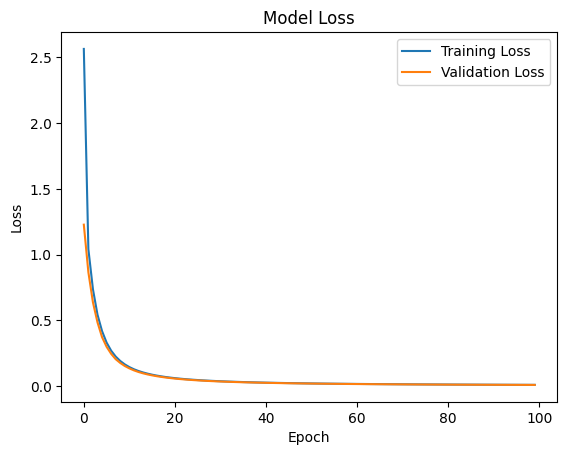

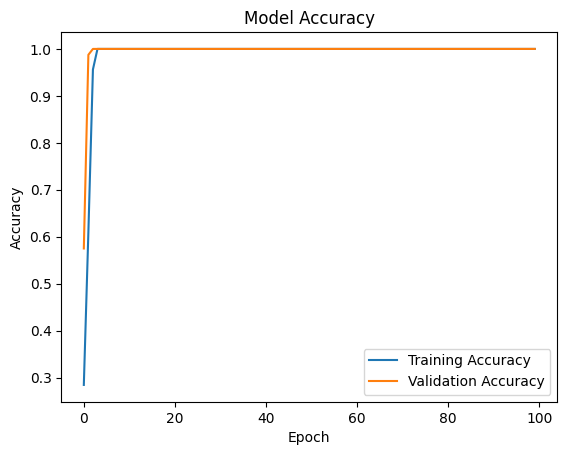

1/1 [==============================] - 0s 25ms/step - loss: 0.0090 - accuracy: 1.0000
Test loss: 0.00898685585707426
Test accuracy: 1.0


In [24]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [25]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
y_test_classes= to_categorical(y_test, 4)

auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

3/3 [==============================] - 0s 1ms/step
Test AUC: 1.0
Test Recall: 1.0
Test F1-score: 1.0
Test Precision: 1.0


Confusion Matrix:


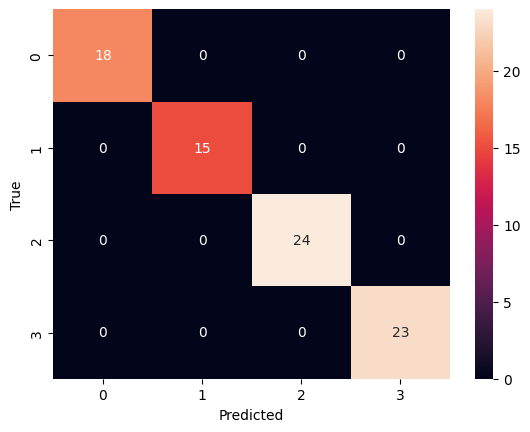

In [26]:
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

# Part B

## 9 features

In [20]:
std_X= X.std(axis=1)
peak_X= X.max(axis=1)
from scipy.stats import skew, kurtosis
skewness_X= skew(X, axis=1)
kurtosis_X= kurtosis(X, axis=1)
crest_factor_X = np.max(X, axis=1) / np.sqrt(np.mean(X**2, axis=1))
ptp_X= np.ptp(X, axis=1)
mean_X= np.mean(X, axis=1)
rms_X = np.sqrt(np.mean(X**2, axis=1))
abs_mean_X= np.mean(np.abs(X), axis=1)

In [21]:
X_new=np.concatenate([std_X, peak_X, skewness_X, kurtosis_X, crest_factor_X, ptp_X, mean_X, rms_X, abs_mean_X],axis=1)

In [29]:
X_new.shape

(400, 18)

## Applying LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda_new = lda.fit_transform(X_new, y)

## MLP on X_new

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

input_shape=x_train[0].shape

num_classes = 4

# Create the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=input_shape))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Define the optimizer and compile the model
import keras
opt = keras.optimizers.Adam(learning_rate=0.0008)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                304       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________


In [32]:
history= model.fit(x_train, y_train , batch_size=32, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
10/10 [==============================] - 1s 42ms/step - loss: 1.4022 - accuracy: 0.4031 - val_loss: 1.2572 - val_accuracy: 0.4625
Epoch 2/250
10/10 [==============================] - 0s 4ms/step - loss: 1.3181 - accuracy: 0.4500 - val_loss: 1.1824 - val_accuracy: 0.5375
Epoch 3/250
10/10 [==============================] - 0s 4ms/step - loss: 1.2564 - accuracy: 0.5219 - val_loss: 1.1315 - val_accuracy: 0.5500
Epoch 4/250
10/10 [==============================] - 0s 5ms/step - loss: 1.2061 - accuracy: 0.5688 - val_loss: 1.0931 - val_accuracy: 0.5875
Epoch 5/250
10/10 [==============================] - 0s 4ms/step - loss: 1.1627 - accuracy: 0.5938 - val_loss: 1.0588 - val_accuracy: 0.6500
Epoch 6/250
10/10 [==============================] - 0s 4ms/step - loss: 1.1238 - accuracy: 0.6094 - val_loss: 1.0324 - val_accuracy: 0.6625
Epoch 7/250
10/10 [==============================] - 0s 5ms/step - loss: 1.0885 - accuracy: 0.6219 - val_loss: 1.0009 - val_accuracy: 0.7000
Epoch 8/250


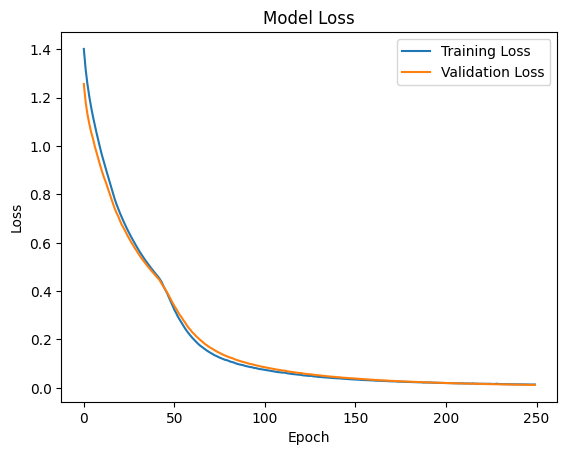

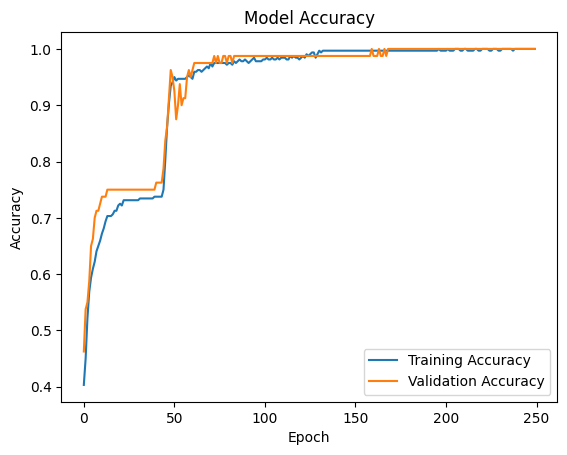

3/3 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 1.0000
Test loss: 0.01205997634679079
Test accuracy: 1.0


In [33]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('Model Loss_mnist.pdf')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Model Accuracy_mnist.pdf')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [34]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
y_test_classes= to_categorical(y_test, 4)

auc_score = roc_auc_score(y_test_classes, y_pred_classes, multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')
print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

3/3 [==============================] - 0s 2ms/step
Test AUC: 1.0
Test Recall: 1.0
Test F1-score: 1.0
Test Precision: 1.0


Confusion Matrix:


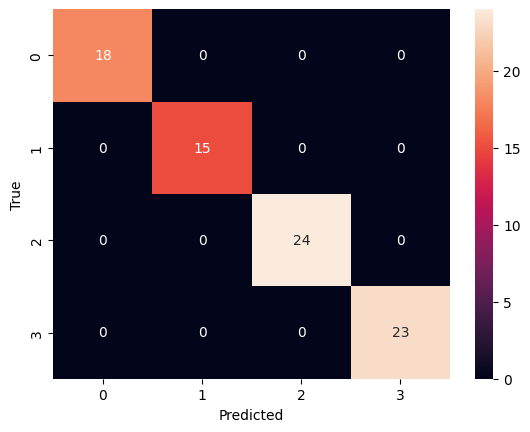

In [35]:
y_test_bin = np.argmax(y_test_classes, axis=1)
y_pred_bin = np.argmax(y_pred_classes, axis=1)
cm = confusion_matrix(y_test_bin, y_pred_bin)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

## MLP with K-fold on X_new

In [36]:
# Define the number of folds for cross-validation
n_folds = 5

# Convert labels to categorical if needed
y_categorical = to_categorical(y)

# Initialize lists to store evaluation results
losses = []
accuracies = []
valid_losses = []
valid_accuracies = []
auc_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

# Perform K-fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X_new, y):
    x_train, x_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Define the input shape and number of classes
    input_shape = x_train.shape[1]
    num_classes = y_categorical.shape[1]

    # Create the model
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    # Define the optimizer and compile the model
    import keras
    opt = keras.optimizers.Adam(learning_rate=0.008)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Define the callback for storing loss and accuracy history
    class LossAccuracyCallback(Callback):
        def on_train_begin(self, logs={}):
            self.losses = []
            self.accs = []
            self.valid_losses = []
            self.valid_accs = []

        def on_epoch_end(self, epoch, logs={}):
            self.losses.append(logs.get('loss'))
            self.accs.append(logs.get('accuracy'))
            self.valid_losses.append(logs.get('val_loss'))
            self.valid_accs.append(logs.get('val_accuracy'))

    callback = LossAccuracyCallback()

    # Train the model with callback
    history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), callbacks=[callback])

    # Evaluate the model on test data
    loss, accuracy = model.evaluate(x_test, y_test)
    losses.append(loss)
    accuracies.append(accuracy)

    # Predict probabilities for calculating AUC score
    y_pred_prob = model.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    auc_scores.append(roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro'))
    recall_scores.append(recall_score(y_true, y_pred, average='macro'))
    f1_scores.append(f1_score(y_true, y_pred, average='macro'))
    precision_scores.append(precision_score(y_true, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_true, y_pred))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                304       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 16ms/step - loss: 1.4352 - accuracy: 0.3812 - val_loss: 1.0953 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.9744 - accuracy: 0.5750 - val_loss: 0.8407 - val_accuracy: 0.6750
Epoch 3/50
10/10 [=====================

3/3 [==============================] - 0s 2ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                304       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 4)                 36        
                                                                 
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 17ms/step - loss: 1.4330 - accuracy: 0.2875 - val_loss: 0.9651 - val_accuracy: 0.4250
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.9463 - accuracy: 0.4594 - val_loss: 0.7887 - val_accur

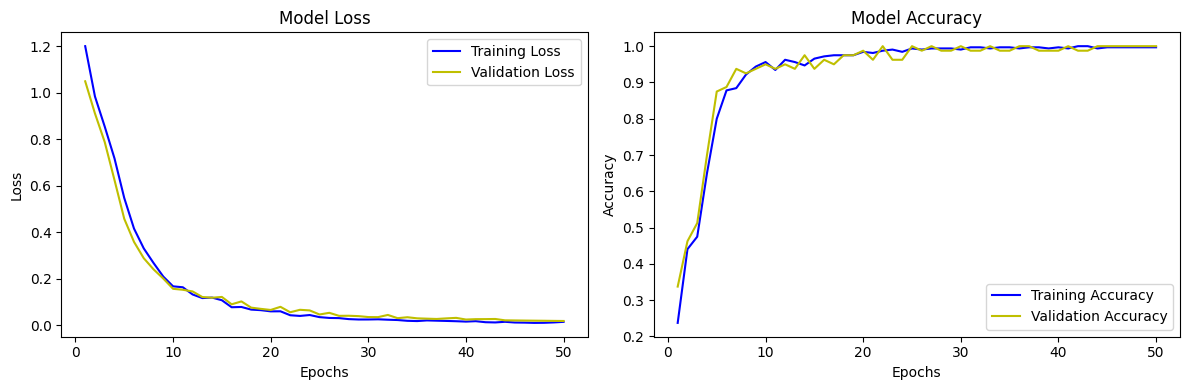

In [37]:
# Plot model loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(callback.losses) + 1), callback.losses, 'b-', label='Training Loss')
plt.plot(range(1, len(callback.valid_losses) + 1), callback.valid_losses, 'y-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot model accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(callback.accs) + 1), callback.accs, 'b-', label='Training Accuracy')
plt.plot(range(1, len(callback.valid_accs) + 1), callback.valid_accs, 'y-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Average loss: 0.01977838482707739
Average accuracy: 0.9925000071525574
Average AUC score: 1.0
Average recall score: 0.9925
Average F1 score: 0.992485905194506
Average precision score: 0.9930735930735931
Average confusion matrix:


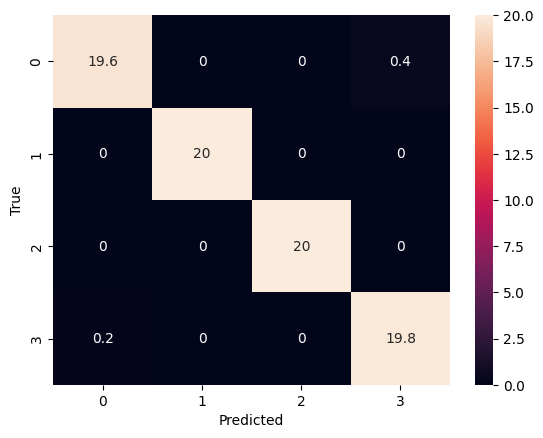

In [38]:
# Print the average results across all folds
print("Average loss:", np.mean(losses))
print("Average accuracy:", np.mean(accuracies))
print("Average AUC score:", np.mean(auc_scores))
print("Average recall score:", np.mean(recall_scores))
print("Average F1 score:", np.mean(f1_scores))
print("Average precision score:", np.mean(precision_scores))
print("Average confusion matrix:")
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

## MLP with K-fold on LDA output

In [39]:
# Define the number of folds for cross-validation
n_folds = 5

# Convert labels to categorical if needed
y_categorical = to_categorical(y)

# Initialize lists to store evaluation results
losses = []
accuracies = []
valid_losses = []
valid_accuracies = []
auc_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

# Perform K-fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X_lda_new, y):
    x_train, x_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Define the input shape and number of classes
    input_shape = x_train.shape[1]
    num_classes = y_categorical.shape[1]

    # Create the model
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    # Define the optimizer and compile the model
    import keras
    opt = keras.optimizers.Adam(learning_rate=0.008)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Define the callback for storing loss and accuracy history
    class LossAccuracyCallback(Callback):
        def on_train_begin(self, logs={}):
            self.losses = []
            self.accs = []
            self.valid_losses = []
            self.valid_accs = []

        def on_epoch_end(self, epoch, logs={}):
            self.losses.append(logs.get('loss'))
            self.accs.append(logs.get('accuracy'))
            self.valid_losses.append(logs.get('val_loss'))
            self.valid_accs.append(logs.get('val_accuracy'))

    callback = LossAccuracyCallback()

    # Train the model with callback
    history = model.fit(x_train, y_train, batch_size=32, epochs=70, validation_data=(x_test, y_test), callbacks=[callback])

    # Evaluate the model on test data
    loss, accuracy = model.evaluate(x_test, y_test)
    losses.append(loss)
    accuracies.append(accuracy)

    # Predict probabilities for calculating AUC score
    y_pred_prob = model.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    auc_scores.append(roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro'))
    recall_scores.append(recall_score(y_true, y_pred, average='macro'))
    f1_scores.append(f1_score(y_true, y_pred, average='macro'))
    precision_scores.append(precision_score(y_true, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_true, y_pred))


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                304       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 4)                 36        
                                                                 
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
10/10 [==============================] - 0s 15ms/step - loss: 1.3129 - accuracy: 0.5031 - val_loss: 1.1270 - val_accuracy: 0.5125
Epoch 2/70
10/10 [==============================] - 0s 4ms/step - loss: 0.9957 - accuracy: 0.6719 - val_loss: 0.8131 - val_accuracy: 0.7375
Epoch 3/70
10/10 [====================

10/10 [==============================] - 1s 44ms/step - loss: 1.4884 - accuracy: 0.4719 - val_loss: 1.1486 - val_accuracy: 0.6125
Epoch 2/70
10/10 [==============================] - 0s 4ms/step - loss: 1.0023 - accuracy: 0.5781 - val_loss: 0.8422 - val_accuracy: 0.6375
Epoch 3/70
10/10 [==============================] - 0s 4ms/step - loss: 0.7444 - accuracy: 0.6656 - val_loss: 0.5701 - val_accuracy: 0.8125
Epoch 4/70
10/10 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.8125 - val_loss: 0.4323 - val_accuracy: 0.9125
Epoch 5/70
10/10 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8438 - val_loss: 0.3433 - val_accuracy: 0.8375
Epoch 6/70
10/10 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.9000 - val_loss: 0.2982 - val_accuracy: 0.8750
Epoch 7/70
10/10 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.9031 - val_loss: 0.2556 - val_accuracy: 0.9000
Epoch 8/70
10/10 [============

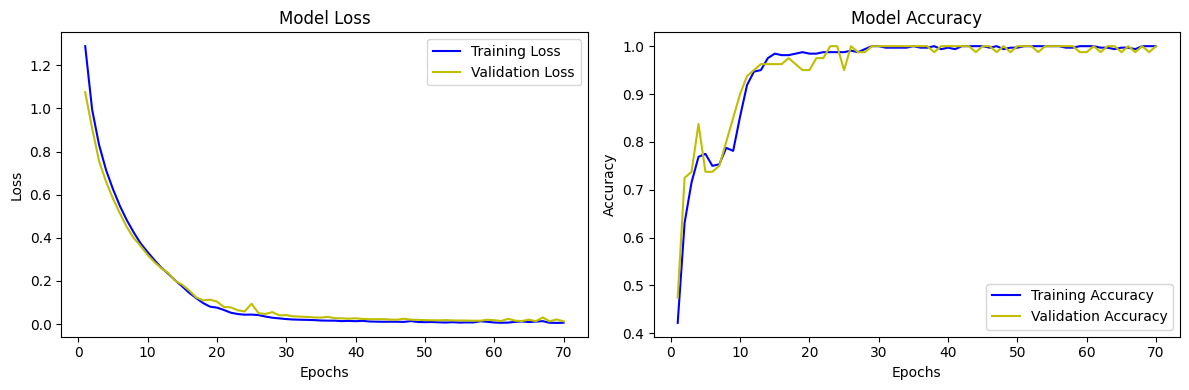

In [40]:
# Plot model loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(callback.losses) + 1), callback.losses, 'b-', label='Training Loss')
plt.plot(range(1, len(callback.valid_losses) + 1), callback.valid_losses, 'y-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot model accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(callback.accs) + 1), callback.accs, 'b-', label='Training Accuracy')
plt.plot(range(1, len(callback.valid_accs) + 1), callback.valid_accs, 'y-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Average loss: 0.011758349044248462
Average accuracy: 0.9950000047683716
Average AUC score: 1.0
Average recall score: 0.9949999999999999
Average F1 score: 0.9949968730456537
Average precision score: 0.9952380952380953
Average confusion matrix:
Confusion Matrix:


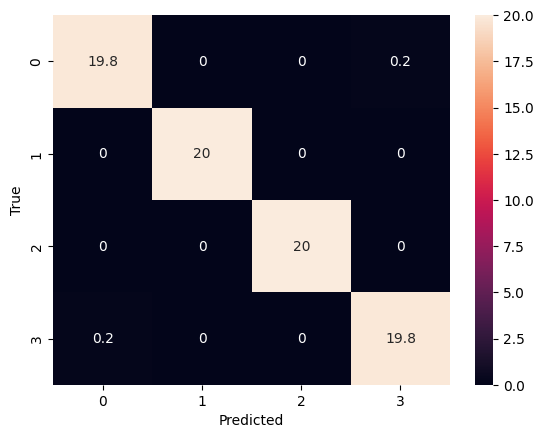

In [41]:
# Print the average results across all folds
print("Average loss:", np.mean(losses))
print("Average accuracy:", np.mean(accuracies))
print("Average AUC score:", np.mean(auc_scores))
print("Average recall score:", np.mean(recall_scores))
print("Average F1 score:", np.mean(f1_scores))
print("Average precision score:", np.mean(precision_scores))
print("Average confusion matrix:")
print("Confusion Matrix:")
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

# Part C

## MLP with K-fold on X_new with reduce lr and gradient decent mementum  

In [42]:
# Define the number of folds for cross-validation
n_folds = 5

# Convert labels to categorical if needed
y_categorical = to_categorical(y)

# Initialize lists to store evaluation results
losses = []
accuracies = []
valid_losses = []
valid_accuracies = []
auc_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

# Perform K-fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X_new, y):
    x_train, x_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Define the input shape and number of classes
    input_shape = x_train.shape[1]
    num_classes = y_categorical.shape[1]

    # Create the model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    # Define the optimizer and compile the model
    from keras.optimizers import SGD

    momentum = 0.9
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Define the callback for storing loss and accuracy history
    class LossAccuracyCallback(Callback):
        def on_train_begin(self, logs={}):
            self.losses = []
            self.accs = []
            self.valid_losses = []
            self.valid_accs = []

        def on_epoch_end(self, epoch, logs={}):
            self.losses.append(logs.get('loss'))
            self.accs.append(logs.get('accuracy'))
            self.valid_losses.append(logs.get('val_loss'))
            self.valid_accs.append(logs.get('val_accuracy'))
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.85, 
                              patience=70, 
                              min_lr=0.001, verbose=1)
    callback = [LossAccuracyCallback(),reduce_lr]

    # Train the model with callback
    history = model.fit(x_train, y_train, batch_size=32, epochs=70, validation_data=(x_test, y_test), callbacks=callback)

    # Evaluate the model on test data
    loss, accuracy = model.evaluate(x_test, y_test)
    losses.append(loss)
    accuracies.append(accuracy)

    # Predict probabilities for calculating AUC score
    y_pred_prob = model.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    auc_scores.append(roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro'))
    recall_scores.append(recall_score(y_true, y_pred, average='macro'))
    f1_scores.append(f1_score(y_true, y_pred, average='macro'))
    precision_scores.append(precision_score(y_true, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_true, y_pred))


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                608       
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dense_44 (Dense)            (None, 4)                 68        
                                                                 
Total params: 1,204
Trainable params: 1,204
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 17ms/step - loss: 1.3694 - accuracy: 0.3812 - val_loss: 1.0044 - val_accuracy: 0.5125 - lr: 0.0100
Epoch 2/70
10/10 [==============================] - 0s 4ms/step - loss: 0.9100 - accuracy: 0.5344 - val_loss: 0.7789 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 3/70
10/10 [==============================] - 0s 4ms/step - loss: 0.7137 - accuracy: 0.5437 - val_loss: 0.6282 - val_accuracy: 0.7375 - lr: 0.0100
Epoch 4/70
10/10 [==============================] - 0s 5ms/step - loss: 0.5740 - accuracy: 0.7437 - val_loss: 0.5141 - val_accuracy: 0.7250 - lr: 0.0100
Epoch 5/70
10/10 [==============================] - 0s 5ms/step - loss: 0.4717 - accuracy: 0.7594 - val_loss: 0.4466 - val_accuracy: 0.8500 - lr: 0.0100
Epoch 6/70
10/10 [==============================] - 0s 5ms/step - loss: 0.4133 - accuracy: 0.8625 - val_loss: 0.4070 - val_accuracy: 0.8500 - lr: 0.0100
Epoch 7/70
10/10 [==============================] - 0s 4ms/step - loss: 0.3862 - accuracy: 0

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 16ms/step - loss: 1.6372 - accuracy: 0.3313 - val_loss: 0.9942 - val_accuracy: 0.5875 - lr: 0.0100
Epoch 2/70
10/10 [==============================] - 0s 5ms/step - loss: 0.8114 - accuracy: 0.6594 - val_loss: 0.6736 - val_accuracy: 0.7625 - lr: 0.0100
Epoch 3/70
10/10 [==============================] - 0s 6ms/step - loss: 0.6113 - accuracy: 0.7156 - val_loss: 0.5053 - val_accuracy: 0.7750 - lr: 0.0100
Epoch 4/70
10/10 [==============================] - 0s 5ms/step - loss: 0.4734 - accuracy: 0.7500 - val_loss: 0.4171 - val_accuracy: 0.8750 - lr: 0.0100
Epoch 5/70
10/10 [==============================] - 0s 6ms/step - loss: 0.4031 - accuracy: 0.8781 - val_loss: 0.3727 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 6/70
10/10 [==============================] - 0s 5ms/step - loss: 0.3624 - accuracy: 0.8875 - val_loss: 0.3367 - val_accuracy: 0.9125 - lr: 0.0100
Epoch 7/70
10/10 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 18ms/step - loss: 1.2778 - accuracy: 0.2562 - val_loss: 1.0038 - val_accuracy: 0.4750 - lr: 0.0100
Epoch 2/70
10/10 [==============================] - 0s 4ms/step - loss: 0.9344 - accuracy: 0.5000 - val_loss: 0.8505 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 3/70
10/10 [==============================] - 0s 4ms/step - loss: 0.7392 - accuracy: 0.6469 - val_loss: 0.6464 - val_accuracy: 0.8625 - lr: 0.0100
Epoch 4/70
10/10 [==============================] - 0s 4ms/step - loss: 0.5637 - accuracy: 0.8156 - val_loss: 0.5151 - val_accuracy: 0.7500 - lr: 0.0100
Epoch 5/70
10/10 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.8313 - val_loss: 0.4182 - val_accuracy: 0.8875 - lr: 0.0100
Epoch 6/70
10/10 [==============================] - 0s 4ms/step - loss: 0.3796 - accuracy: 0.8813 - val_loss: 0.3604 - val_accuracy: 0.8500 - lr: 0.0100
Epoch 7/70
10/10 [==============================] - 0s 4ms/step - loss: 0.3378 - accuracy: 0

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 19ms/step - loss: 1.5990 - accuracy: 0.2688 - val_loss: 0.8969 - val_accuracy: 0.4125 - lr: 0.0100
Epoch 2/70
10/10 [==============================] - 0s 10ms/step - loss: 0.7487 - accuracy: 0.6750 - val_loss: 0.5788 - val_accuracy: 0.8000 - lr: 0.0100
Epoch 3/70
10/10 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.8844 - val_loss: 0.4331 - val_accuracy: 0.8250 - lr: 0.0100
Epoch 4/70
10/10 [==============================] - 0s 5ms/step - loss: 0.3952 - accuracy: 0.8156 - val_loss: 0.3352 - val_accuracy: 0.9125 - lr: 0.0100
Epoch 5/70
10/10 [==============================] - 0s 4ms/step - loss: 0.3275 - accuracy: 0.9125 - val_loss: 0.2912 - val_accuracy: 0.9125 - lr: 0.0100
Epoch 6/70
10/10 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 0.9312 - val_loss: 0.2596 - val_accuracy: 0.9250 - lr: 0.0100
Epoch 7/70
10/10 [==============================] - 0s 4ms/step - loss: 0.2632 - accuracy: 

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 18ms/step - loss: 1.4481 - accuracy: 0.3844 - val_loss: 0.9128 - val_accuracy: 0.5500 - lr: 0.0100
Epoch 2/70
10/10 [==============================] - 0s 4ms/step - loss: 0.7880 - accuracy: 0.6906 - val_loss: 0.6959 - val_accuracy: 0.7375 - lr: 0.0100
Epoch 3/70
10/10 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.7844 - val_loss: 0.4733 - val_accuracy: 0.9000 - lr: 0.0100
Epoch 4/70
10/10 [==============================] - 0s 5ms/step - loss: 0.4313 - accuracy: 0.8656 - val_loss: 0.3874 - val_accuracy: 0.7750 - lr: 0.0100
Epoch 5/70
10/10 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.8625 - val_loss: 0.3075 - val_accuracy: 0.9375 - lr: 0.0100
Epoch 6/70
10/10 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.8906 - val_loss: 0.2907 - val_accuracy: 0.8375 - lr: 0.0100
Epoch 7/70
10/10 [==============================] - 0s 5ms/step - loss: 0.2711 - accuracy: 0

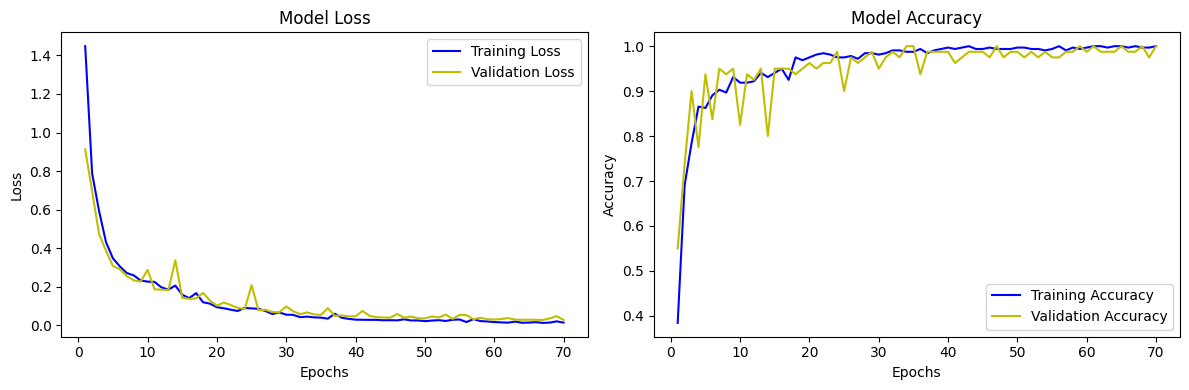

In [43]:
# Plot model loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(callback[0].losses) + 1), callback[0].losses, 'b-', label='Training Loss')
plt.plot(range(1, len(callback[0].valid_losses) + 1), callback[0].valid_losses, 'y-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot model accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(callback[0].accs) + 1), callback[0].accs, 'b-', label='Training Accuracy')
plt.plot(range(1, len(callback[0].valid_accs) + 1), callback[0].valid_accs, 'y-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Average loss: 0.015739577077329158
Average accuracy: 0.9975000023841858
Average AUC score: 1.0
Average recall score: 0.9974999999999999
Average F1 score: 0.9974984365228268
Average precision score: 0.9976190476190476
Average confusion matrix:
Confusion Matrix:


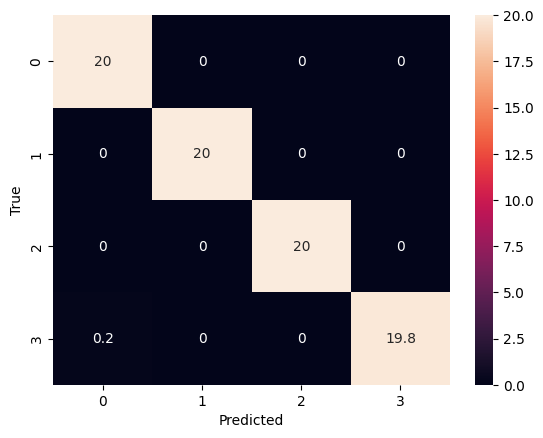

In [45]:
# Print the average results across all folds
print("Average loss:", np.mean(losses))
print("Average accuracy:", np.mean(accuracies))
print("Average AUC score:", np.mean(auc_scores))
print("Average recall score:", np.mean(recall_scores))
print("Average F1 score:", np.mean(f1_scores))
print("Average precision score:", np.mean(precision_scores))
print("Average confusion matrix:")
print("Confusion Matrix:")
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()

## MLP with K-fold on X_lda_new with reduce lr and gradient decent mementum  

In [46]:
# Define the number of folds for cross-validation
n_folds = 5

# Convert labels to categorical if needed
y_categorical = to_categorical(y)

# Initialize lists to store evaluation results
losses = []
accuracies = []
valid_losses = []
valid_accuracies = []
auc_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

# Perform K-fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X_lda_new, y):
    x_train, x_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Define the input shape and number of classes
    input_shape = x_train.shape[1]
    num_classes = y_categorical.shape[1]

    # Create the model
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    from keras.optimizers import SGD

    momentum = 0.55
    opt = SGD(lr=0.05, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Define the callback for storing loss and accuracy history
    class LossAccuracyCallback(Callback):
        def on_train_begin(self, logs={}):
            self.losses = []
            self.accs = []
            self.valid_losses = []
            self.valid_accs = []

        def on_epoch_end(self, epoch, logs={}):
            self.losses.append(logs.get('loss'))
            self.accs.append(logs.get('accuracy'))
            self.valid_losses.append(logs.get('val_loss'))
            self.valid_accs.append(logs.get('val_accuracy'))

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.3, 
                              patience=3, 
                              min_lr=0.001, verbose=1)
    
    callback = [LossAccuracyCallback(),reduce_lr]

    # Train the model with callback
    history = model.fit(x_train, y_train, batch_size=32, epochs=80, validation_data=(x_test, y_test), callbacks=callback)

    # Evaluate the model on test data
    loss, accuracy = model.evaluate(x_test, y_test)
    losses.append(loss)
    accuracies.append(accuracy)

    # Predict probabilities for calculating AUC score
    y_pred_prob = model.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    auc_scores.append(roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro'))
    recall_scores.append(recall_score(y_true, y_pred, average='macro'))
    f1_scores.append(f1_score(y_true, y_pred, average='macro'))
    precision_scores.append(precision_score(y_true, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_true, y_pred))


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                304       
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dense_59 (Dense)            (None, 4)                 36        
                                                                 
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 17ms/step - loss: 1.2899 - accuracy: 0.4500 - val_loss: 0.9873 - val_accuracy: 0.6375 - lr: 0.0500
Epoch 2/80
10/10 [==============================] - 0s 4ms/step - loss: 0.8754 - accuracy: 0.6125 - val_loss: 0.7529 - val_accuracy: 0.7250 - lr: 0.0500
Epoch 3/80
10/10 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.7563 - val_loss: 0.5664 - val_accuracy: 0.8125 - lr: 0.0500
Epoch 4/80
10/10 [==============================] - 0s 6ms/step - loss: 0.5230 - accuracy: 0.7875 - val_loss: 0.4623 - val_accuracy: 0.7500 - lr: 0.0500
Epoch 5/80
10/10 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.7812 - val_loss: 0.4084 - val_accuracy: 0.7500 - lr: 0.0500
Epoch 6/80
10/10 [==============================] - 0s 4ms/step - loss: 0.3906 - accuracy: 0.8031 - val_loss: 0.3612 - val_accuracy: 0.8375 - lr: 0.0500
Epoch 7/80
10/10 [==============================] - 0s 4ms/step - loss: 0.3547 - accuracy: 0

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 15ms/step - loss: 1.1217 - accuracy: 0.4719 - val_loss: 0.9988 - val_accuracy: 0.5875 - lr: 0.0500
Epoch 2/80
10/10 [==============================] - 0s 4ms/step - loss: 0.9505 - accuracy: 0.5250 - val_loss: 0.8869 - val_accuracy: 0.5500 - lr: 0.0500
Epoch 3/80
10/10 [==============================] - 0s 4ms/step - loss: 0.8213 - accuracy: 0.5906 - val_loss: 0.7533 - val_accuracy: 0.6750 - lr: 0.0500
Epoch 4/80
10/10 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.7188 - val_loss: 0.6141 - val_accuracy: 0.7750 - lr: 0.0500
Epoch 5/80
10/10 [==============================] - 0s 4ms/step - loss: 0.5537 - accuracy: 0.7469 - val_loss: 0.5166 - val_accuracy: 0.7750 - lr: 0.0500
Epoch 6/80
10/10 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.7375 - val_loss: 0.4591 - val_accuracy: 0.7375 - lr: 0.0500
Epoch 7/80
10/10 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 1s 15ms/step - loss: 1.1659 - accuracy: 0.3250 - val_loss: 0.9656 - val_accuracy: 0.6000 - lr: 0.0500
Epoch 2/80
10/10 [==============================] - 0s 5ms/step - loss: 0.8941 - accuracy: 0.7375 - val_loss: 0.8361 - val_accuracy: 0.6750 - lr: 0.0500
Epoch 3/80
10/10 [==============================] - 0s 5ms/step - loss: 0.7756 - accuracy: 0.7594 - val_loss: 0.7146 - val_accuracy: 0.7625 - lr: 0.0500
Epoch 4/80
10/10 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.7875 - val_loss: 0.5997 - val_accuracy: 0.8375 - lr: 0.0500
Epoch 5/80
10/10 [==============================] - 0s 6ms/step - loss: 0.5503 - accuracy: 0.8438 - val_loss: 0.5016 - val_accuracy: 0.8875 - lr: 0.0500
Epoch 6/80
10/10 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.8594 - val_loss: 0.4262 - val_accuracy: 0.8625 - lr: 0.0500
Epoch 7/80
10/10 [==============================] - 0s 5ms/step - loss: 0.3910 - accuracy: 0

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 1s 22ms/step - loss: 1.4853 - accuracy: 0.1813 - val_loss: 1.3824 - val_accuracy: 0.2500 - lr: 0.0500
Epoch 2/80
10/10 [==============================] - 0s 6ms/step - loss: 1.3683 - accuracy: 0.2500 - val_loss: 1.3405 - val_accuracy: 0.2500 - lr: 0.0500
Epoch 3/80
10/10 [==============================] - 0s 5ms/step - loss: 1.3141 - accuracy: 0.2500 - val_loss: 1.2677 - val_accuracy: 0.2500 - lr: 0.0500
Epoch 4/80
10/10 [==============================] - 0s 7ms/step - loss: 1.2384 - accuracy: 0.3906 - val_loss: 1.1816 - val_accuracy: 0.5125 - lr: 0.0500
Epoch 5/80
10/10 [==============================] - 0s 7ms/step - loss: 1.1414 - accuracy: 0.5406 - val_loss: 1.0822 - val_accuracy: 0.5125 - lr: 0.0500
Epoch 6/80
10/10 [==============================] - 0s 6ms/step - loss: 1.0590 - accuracy: 0.5594 - val_loss: 1.0000 - val_accuracy: 0.6750 - lr: 0.0500
Epoch 7/80
10/10 [==============================] - 0s 5ms/step - loss: 0.9794 - accuracy: 0

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 16ms/step - loss: 1.2419 - accuracy: 0.4656 - val_loss: 1.0055 - val_accuracy: 0.5125 - lr: 0.0500
Epoch 2/80
10/10 [==============================] - 0s 4ms/step - loss: 0.9394 - accuracy: 0.5750 - val_loss: 0.8741 - val_accuracy: 0.6250 - lr: 0.0500
Epoch 3/80
10/10 [==============================] - 0s 4ms/step - loss: 0.8227 - accuracy: 0.6438 - val_loss: 0.7643 - val_accuracy: 0.7125 - lr: 0.0500
Epoch 4/80
10/10 [==============================] - 0s 4ms/step - loss: 0.7071 - accuracy: 0.7125 - val_loss: 0.6542 - val_accuracy: 0.7250 - lr: 0.0500
Epoch 5/80
10/10 [==============================] - 0s 4ms/step - loss: 0.6017 - accuracy: 0.7500 - val_loss: 0.5474 - val_accuracy: 0.7750 - lr: 0.0500
Epoch 6/80
10/10 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.8062 - val_loss: 0.4440 - val_accuracy: 0.7875 - lr: 0.0500
Epoch 7/80
10/10 [==============================] - 0s 4ms/step - loss: 0.4113 - accuracy: 0

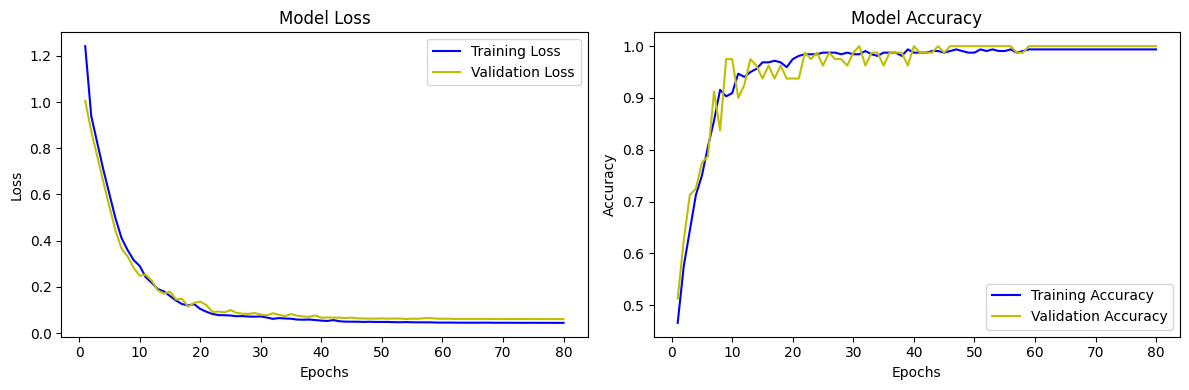

In [47]:
# Plot model loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(callback[0].losses) + 1), callback[0].losses, 'b-', label='Training Loss')
plt.plot(range(1, len(callback[0].valid_losses) + 1), callback[0].valid_losses, 'y-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot model accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(callback[0].accs) + 1), callback[0].accs, 'b-', label='Training Accuracy')
plt.plot(range(1, len(callback[0].valid_accs) + 1), callback[0].valid_accs, 'y-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Average loss: 0.041221142560243604
Average accuracy: 0.9950000047683716
Average AUC score: 1.0
Average recall score: 0.9949999999999999
Average F1 score: 0.9949874686716793
Average precision score: 0.9954545454545455
Average confusion matrix:
Confusion Matrix:


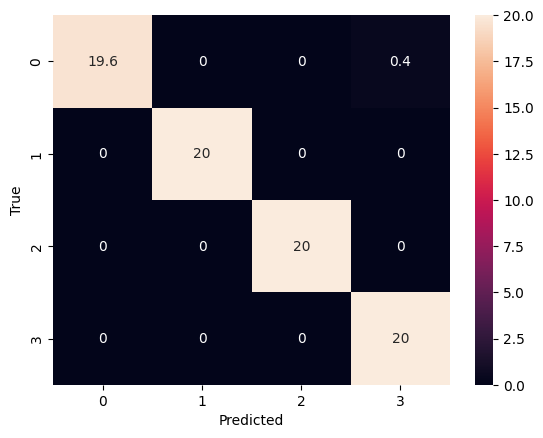

In [48]:
# Print the average results across all folds
print("Average loss:", np.mean(losses))
print("Average accuracy:", np.mean(accuracies))
print("Average AUC score:", np.mean(auc_scores))
print("Average recall score:", np.mean(recall_scores))
print("Average F1 score:", np.mean(f1_scores))
print("Average precision score:", np.mean(precision_scores))
print("Average confusion matrix:")
print("Confusion Matrix:")
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('conf.pdf')
plt.show()